In [21]:
#Importing packages
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

Text(0.5, 0, 'X')

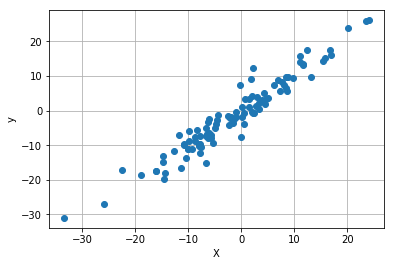

In [22]:
X = torch.randn(100,1) * 10
y = X + 3 * torch.randn(100,1)

plt.plot(X.numpy(),y.numpy(),'o')
plt.grid()
plt.ylabel('y')
plt.xlabel('X')

In [23]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [24]:
torch.manual_seed(1)
model = LR(1,1)

print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [25]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [26]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

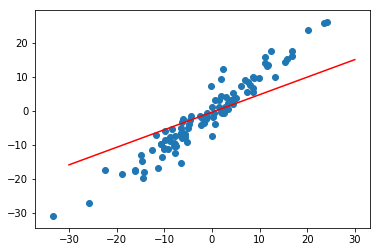

In [27]:
plot_fit('Initial Model')

In [28]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [29]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    
    print("epoch:", i, "loss:", loss.item())
    
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 36.44832992553711
epoch: 1 loss: 43.94552230834961
epoch: 2 loss: 53.461822509765625
epoch: 3 loss: 65.54042053222656
epoch: 4 loss: 80.87049865722656
epoch: 5 loss: 100.32696533203125
epoch: 6 loss: 125.01981353759766
epoch: 7 loss: 156.35780334472656
epoch: 8 loss: 196.1287384033203
epoch: 9 loss: 246.6014404296875
epoch: 10 loss: 310.6552429199219
epoch: 11 loss: 391.94354248046875
epoch: 12 loss: 495.1043701171875
epoch: 13 loss: 626.021240234375
epoch: 14 loss: 792.162109375
epoch: 15 loss: 1003.0046997070312
epoch: 16 loss: 1270.573974609375
epoch: 17 loss: 1610.1314697265625
epoch: 18 loss: 2041.047119140625
epoch: 19 loss: 2587.899169921875
epoch: 20 loss: 3281.88427734375
epoch: 21 loss: 4162.58251953125
epoch: 22 loss: 5280.22607421875
epoch: 23 loss: 6698.5693359375
epoch: 24 loss: 8498.501953125
epoch: 25 loss: 10782.724609375
epoch: 26 loss: 13681.5009765625
epoch: 27 loss: 17360.19140625
epoch: 28 loss: 22028.619140625
epoch: 29 loss: 27953.03125
epoch: 30 

In [ ]:
plt.plot(range(epochs, losses))